<a href="https://colab.research.google.com/github/IvanIndargo/Datamining_exersice/blob/main/Week_7_Responsi_%5BQuestion%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Ivan Indargo - 0706022210064**

# **Week 7**


---


## Random Forest and Gradient Boosting Classifier
Today lab exercise will be using Bank Marketing Dataset
- Download the **Bank Marketing Dataset** from Elearn
- Upload the dataset to your own Github
- Import the dataset using URL from your Github

**METADATA** <br>
Age <br>
Job : type of job <br>
Marital : marital status <br>
Education <br>
Default: has credit in default? <br>
Housing: has housing loan? <br>
Loan: has personal loan? <br>
Contact: contact communication type <br>
Month: last contact month of year <br>
Day: last contact day of the week <br>
Duration: last contact duration, in seconds. Important
note: this attribute highly affects the output target (e.g., if
duration=0 then y='no'). <br>
Campaign: number of contacts performed during this campaign and for
this client (includes last contact) <br>
Pdays: number of days that passed by after the client was last
contacted from a previous campaign (999 means client was not
previously contacted) <br>
Previous: number of contacts performed before this campaign and for
this client <br>
Poutcome: outcome of the previous marketing campaign <br>
y: has the client subscribed a term deposit?

## Import Libraries

In [1]:
# Mengimport library yang digunakan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
from sklearn.naive_bayes import GaussianNB

## Load Dataset

In [2]:
url = 'https://raw.githubusercontent.com/IvanIndargo/dataset-DM/refs/heads/main/Bank.csv'
df = pd.read_csv(url, delimiter=';') #mengimport dataset

df.sample(10) #menampilkan sepuluh data random dari dataset untuk pengecekan data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1145,59,self-employed,married,primary,no,0,yes,no,telephone,28,jul,97,2,-1,0,unknown,no
4041,33,blue-collar,divorced,secondary,no,474,no,no,cellular,22,jul,400,2,-1,0,unknown,no
3659,52,technician,married,secondary,no,64,no,no,telephone,29,aug,20,2,-1,0,unknown,no
3198,60,management,married,tertiary,no,759,no,no,cellular,14,aug,136,2,-1,0,unknown,no
1916,51,entrepreneur,married,tertiary,no,3921,yes,no,cellular,5,may,168,1,-1,0,unknown,no
3108,38,blue-collar,married,primary,no,1679,yes,no,unknown,20,jun,21,18,-1,0,unknown,no
2560,44,blue-collar,married,secondary,no,1071,yes,no,cellular,11,may,143,3,357,1,failure,no
3427,52,entrepreneur,married,secondary,no,0,no,no,cellular,7,aug,82,2,-1,0,unknown,no
1852,50,technician,married,secondary,no,669,yes,no,unknown,2,jun,88,1,-1,0,unknown,no
65,51,blue-collar,divorced,secondary,no,203,yes,no,cellular,8,may,134,1,170,5,failure,no


## Exploratory Data Analysis
Explore the data to identify patterns within the dataset. <br>
Hint: <br>
* There are no missing values, but some columns contain 'unknown' values. Decide whether it is best to drop it or not.
* The 'admin' and 'management' unique value in the job column represent similar roles, so you can combine them under a single categorical value.




In [3]:
df.info()#menampilkan info dari kolom dataset untuk menunjukkan jumlah data, jumlah kolom, nama kolom, mengecek kekosongan data, dan tipe data untuk memudahkan analisa

df.describe()# menunjukkan deskripi kolom dari masing masing dataset, seperti rata-rata, nilai minimum, nilai maksimum, nilai tengah, dan lainnya untuk membantu dalam analisa

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [4]:
for column in df.columns:
    jumlah_unknown = df[column].value_counts().get("unknown", 0)
    print(f"Jumlah 'unknown' di kolom '{column}':", jumlah_unknown)
#Digunakan untuk menampilkan jumlah seluruh value 'unknown' di masing-masing kolom dataset

Jumlah 'unknown' di kolom 'age': 0
Jumlah 'unknown' di kolom 'job': 38
Jumlah 'unknown' di kolom 'marital': 0
Jumlah 'unknown' di kolom 'education': 187
Jumlah 'unknown' di kolom 'default': 0
Jumlah 'unknown' di kolom 'balance': 0
Jumlah 'unknown' di kolom 'housing': 0
Jumlah 'unknown' di kolom 'loan': 0
Jumlah 'unknown' di kolom 'contact': 1324
Jumlah 'unknown' di kolom 'day': 0
Jumlah 'unknown' di kolom 'month': 0
Jumlah 'unknown' di kolom 'duration': 0
Jumlah 'unknown' di kolom 'campaign': 0
Jumlah 'unknown' di kolom 'pdays': 0
Jumlah 'unknown' di kolom 'previous': 0
Jumlah 'unknown' di kolom 'poutcome': 3705
Jumlah 'unknown' di kolom 'y': 0


In [5]:
print(df['y'].value_counts(dropna=False))
#menampilkan jumlah value di kolom y

y
no     4000
yes     521
Name: count, dtype: int64


In [6]:
df['job'] = df['job'].replace('admin.', 'management')

df.sample(10)
#mengreplace value unknown

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
3688,38,unemployed,married,secondary,no,-673,yes,no,unknown,26,may,364,1,-1,0,unknown,no
2717,29,technician,single,tertiary,no,2325,no,no,cellular,2,feb,125,1,-1,0,unknown,yes
3736,41,technician,married,tertiary,no,532,yes,no,cellular,9,jul,74,1,-1,0,unknown,no
2686,31,blue-collar,married,secondary,no,0,no,yes,telephone,15,jul,275,2,-1,0,unknown,no
1693,37,technician,single,secondary,no,2442,no,no,cellular,16,feb,91,3,-1,0,unknown,yes
4294,42,services,married,secondary,no,-246,yes,no,unknown,7,may,149,1,-1,0,unknown,no
3256,36,management,married,tertiary,no,495,no,no,cellular,12,mar,213,3,182,6,success,yes
3847,33,unemployed,divorced,secondary,no,385,no,no,telephone,27,aug,29,28,-1,0,unknown,no
2160,60,management,married,tertiary,no,3387,no,no,cellular,14,aug,636,2,-1,0,unknown,no
490,52,blue-collar,married,unknown,no,826,yes,no,unknown,15,may,468,2,-1,0,unknown,no


In [7]:
label_encoder = LabelEncoder()
# untuk mengubah kolom kategorikal (workclass, education, dll) menjadi numerik

categorical_columns = df.select_dtypes(include=['object']).columns
# untuk identifikasi dan memilih semua kolom kategorikal

for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])
# untuk mengonversi setiap kolom kategorikal ke numerik

df.sample(10)
# untuk menampilkan 10 data random

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
981,28,0,2,1,0,3412,1,0,0,15,8,22,4,-1,0,3,0
54,53,0,1,1,0,2231,1,0,0,14,5,272,3,-1,0,3,0
4518,57,8,1,1,0,295,0,0,0,19,1,151,11,-1,0,3,0
2622,30,3,2,1,0,1009,1,0,0,29,4,253,1,-1,0,3,0
2202,29,3,1,2,0,199,1,1,2,7,8,1689,4,-1,0,3,1
1693,37,8,2,1,0,2442,0,0,0,16,3,91,3,-1,0,3,1
3930,51,4,0,1,0,1679,0,0,0,12,1,417,1,365,9,1,1
893,49,3,2,1,0,61,1,0,0,29,4,185,2,246,1,0,0
2105,34,1,1,1,0,4659,1,0,2,30,1,28,1,-1,0,3,0
4021,46,0,1,3,0,9328,1,0,0,5,8,725,3,-1,0,3,1


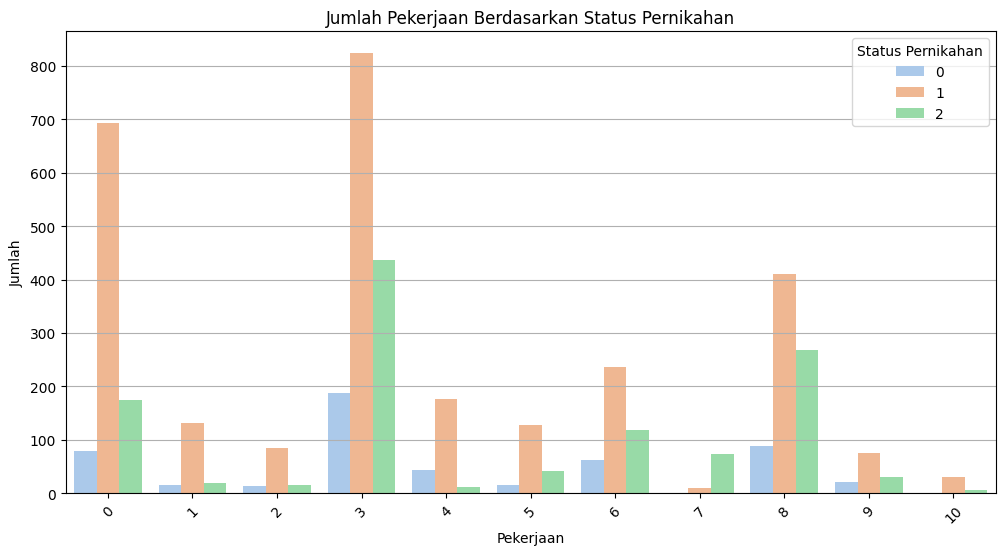

In [8]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='job', hue='marital', palette='pastel')
plt.title("Jumlah Pekerjaan Berdasarkan Status Pernikahan")
plt.xlabel("Pekerjaan")
plt.ylabel("Jumlah")
plt.xticks(rotation=45)
plt.legend(title='Status Pernikahan')
plt.grid(axis='y')
plt.show()
#menampilkan jumlah pekerjaan berdasarkan status pernikahan

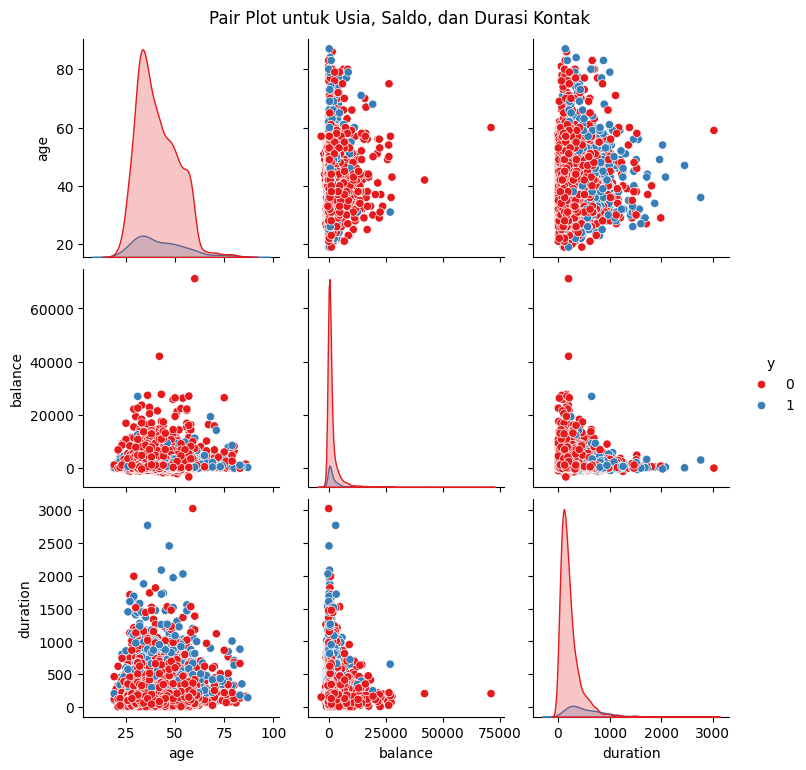

In [9]:
sns.pairplot(df, vars=['age', 'balance', 'duration'], hue='y', palette='Set1')
plt.suptitle('Pair Plot untuk Usia, Saldo, dan Durasi Kontak', y=1.02)
plt.show()
#menampilkan visualisasi pair plot untuk koom usia, saldo, durasi

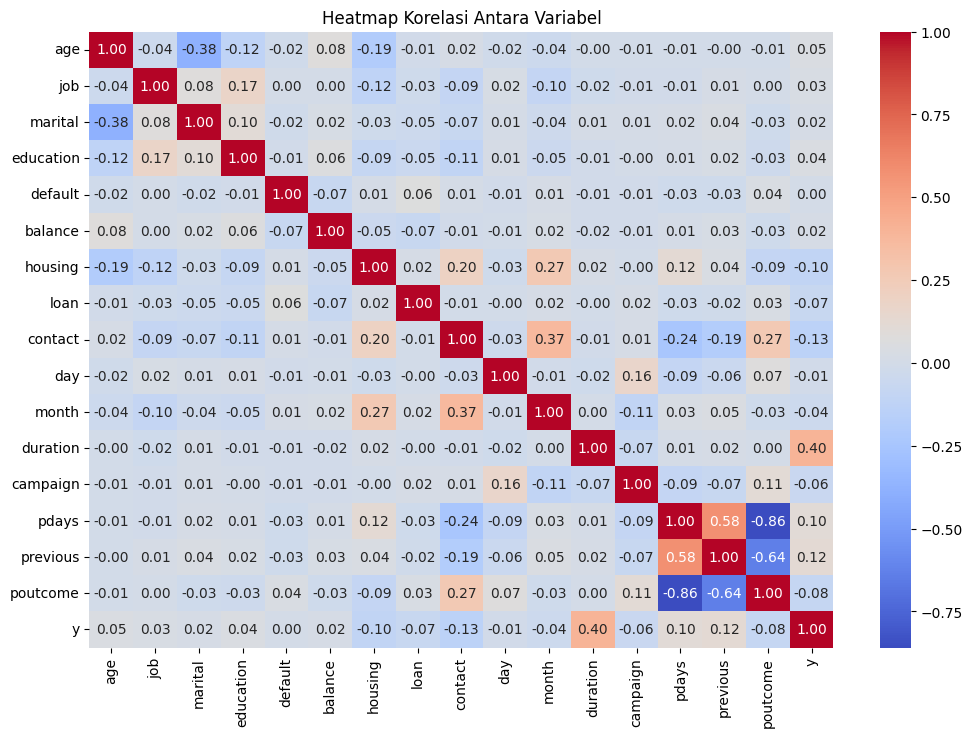

In [10]:
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Heatmap Korelasi Antara Variabel")
plt.show()
#warna merah tua menunjukkan korelasi positif yang kuat (mendekati 1) dan biru tua menunjukkan korelasi negatif yang kuat (mendekati -1).

## Machine Learning (Split Data)

In [11]:
X = df.drop(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'campaign','pdays','previous','poutcome', 'y'], axis = 1)
y = df['y']
#menentukan variabel dependent dan independent untuk melakukan analisa
#disini hanya menggunakan variabel x dengan value kolom duration dan variabel y dengan value kolom y
#penggunaan kolom duration dikarenakan korelasi dengan kolom y paling tinggi dan positif

In [12]:
from imblearn.combine import SMOTEENN

smote_enn = SMOTEENN(random_state=0)

X, y = smote_enn.fit_resample(X, y)

print("Class distribution after SMOTEEN:")
print(y.value_counts())
#penggunaan metode smoteenn untuk menyeimbangkan jumlah data

Class distribution after SMOTEEN:
y
0    2691
1    1391
Name: count, dtype: int64


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
#untuk memisahkan data menjadi dua bagian, sebagian data dijadikan data training dan sebagian lainnya digunakan untuk data test
#besar pembagian data nya dapat dirubah dan dibuat dengan mengganti test size
#di sini besar data test 20 persen dan data training sebanyak 80 persen

## Random Forest


---

a. Defining the model <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Confusion matrix <br>
e. Classification report <br>
f. Results and conclusion <br>

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier.fit(X_train, y_train)
#pembuatan dan pelatihan pemodelan random forest classifier

RandomForestClassifier(random_state=42)

In [15]:
y_pred_rf = rf_classifier.predict(X_test)
#membuat variabel untuk pemrediksian data x_test

In [16]:
accuracy = accuracy_score(y_test, y_pred_rf)
print(f'Accuracy: {accuracy}')
#menampilkan tingkat atau score keakurasian

Accuracy: 0.9987760097919217


In [17]:
y_train_rf = rf_classifier.predict(X_train)
test_accuracy = accuracy_score(y_test, y_pred_rf)
training_accuracy = accuracy_score(y_train, y_train_rf)

print('Testing accuracy: {0:0.4f}'.format(test_accuracy))
print('Training accuracy: {0:0.4f}'.format(training_accuracy))
# membuat pelatihan model dan prediksi serta melihat keakurasian pemodelan apakan model ini overfitting, underfitting, atau model tersebut sudah balance

Testing accuracy: 0.9988
Training accuracy: 1.0000


In [18]:
cm_rf = confusion_matrix(y_test, y_pred_rf)

print("\nConfusion Matrix Random Forest:")
print(cm_rf)
#pembuatan confusion matrix


Confusion Matrix Random Forest:
[[561   1]
 [  0 255]]


## Gradient Boosting Classifier


---

a. Defining the model <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Confusion matrix <br>
e. Classification report <br>
f. Results and conclusion <br>

In [21]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
gb_model = GradientBoostingClassifier(random_state=42)

gb_model.fit(X_train, y_train)
#pembuatan dan pelatihan pemodelan gradient boosting classifier

GradientBoostingClassifier(random_state=42)

In [22]:
y_pred = gb_model.predict(X_test)
#membuat variabel untuk pemrediksian data x_test

In [23]:
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
#menampilkan tingkat atau score keakurasian

Accuracy: 0.9902080783353733


In [24]:
cm_xg = confusion_matrix(y_test, y_pred)

print("\nConfusion Matrix XGBoost:")
print(cm_xg)
#pembuatan confusion matrix


Confusion Matrix XGBoost:
[[559   3]
 [  5 250]]


In [26]:
class_report_rf = classification_report(y_test, y_pred_rf)

print("Classification Report Random Forest: \n", class_report_rf)
class_report_xg = classification_report(y_test, y_pred)

print("Classification Report Gradient Boosting: \n", class_report_xg)
#untuk menampilkan laporan random forest dan gradient boosting
#dilihat dari hasil laporannya keduanya memiliki tingkat akurasi yang hampir sama di angka 1.00 dan 0.99 dan nilai dari recall, precision, f1-score yang hanya memiliki sedikit perbedaan
#hal ini dapat menunjukkan bahwa kedua pemodelan tersebut sama akuratnya tetapi kita dapat menentukan dan mengambil pemodelan yang memiliki performa lebih baik

Classification Report Random Forest: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       562
           1       1.00      1.00      1.00       255

    accuracy                           1.00       817
   macro avg       1.00      1.00      1.00       817
weighted avg       1.00      1.00      1.00       817

Classification Report Gradient Boosting: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       562
           1       0.99      0.98      0.98       255

    accuracy                           0.99       817
   macro avg       0.99      0.99      0.99       817
weighted avg       0.99      0.99      0.99       817

